In [6]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import random
import pandas as pd
import scipy.special as sc
import scipy.integrate as integrate
from scipy.stats import uniform
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower
from scipy.stats import gaussian_kde
from arch import arch_model
from random import gauss
from scipy.special import gamma
from scipy.stats import binom
import Theory_Application as th
from scipy.stats import norm


# DATA:

In [11]:
SPX = pd.read_csv("SPX.csv", parse_dates=['Date'], index_col='Date')
SPX_full = SPX.loc['2020-01-02':'2023-12-29', 'Adj Close']
SPX_full_returns = SPX_full.pct_change().dropna()*100

SPX_train = SPX.loc['2020-01-02':'2022-12-30', 'Adj Close']
SPX_train_returns = SPX_train.pct_change().dropna()*100

SPX_test = SPX.loc['2023-01-03':'2023-12-29','Adj Close']
SPX_test_returns = SPX_test.pct_change().dropna()*100

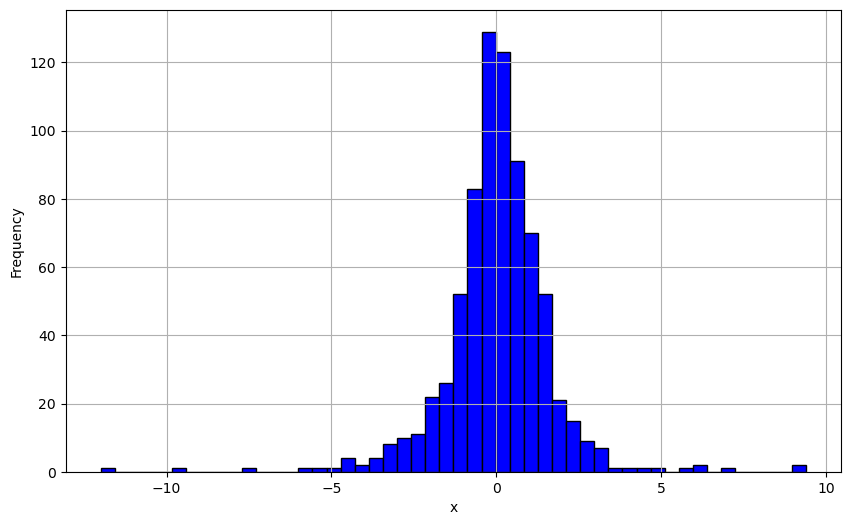

In [12]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(SPX_train_returns, bins=50, color='blue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

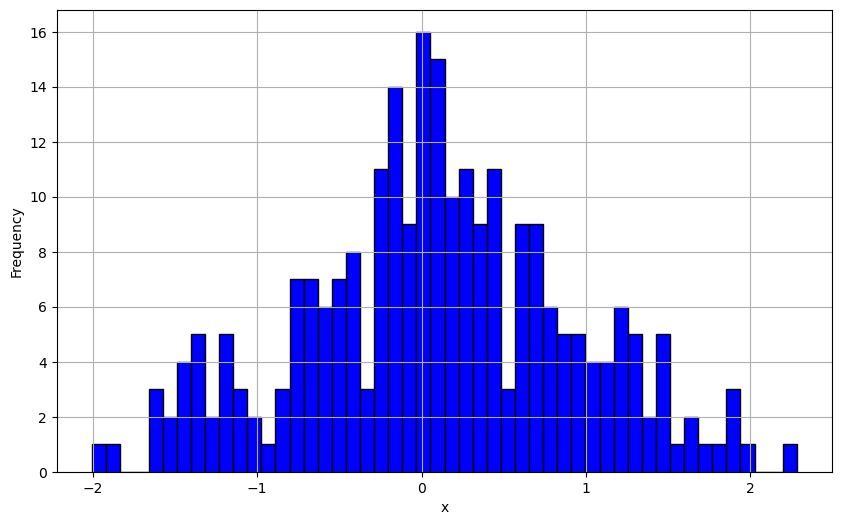

In [13]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(SPX_test_returns, bins=50, color='blue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

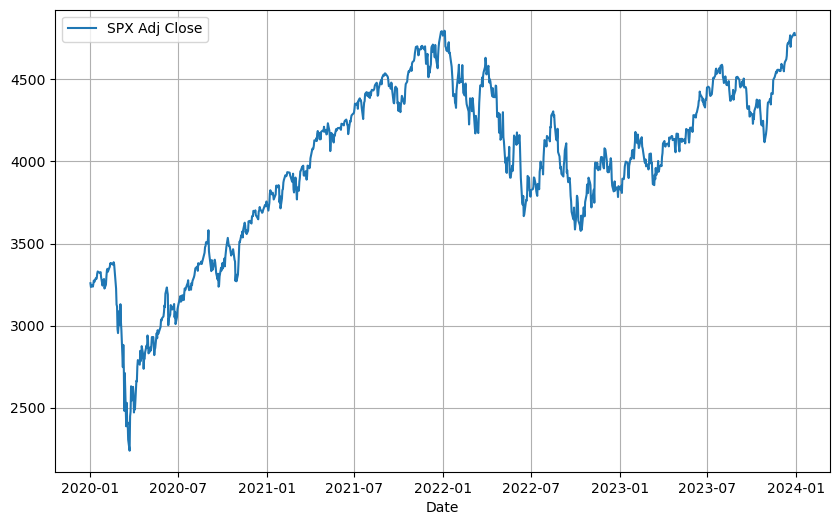

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(SPX_full, label='SPX Adj Close')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

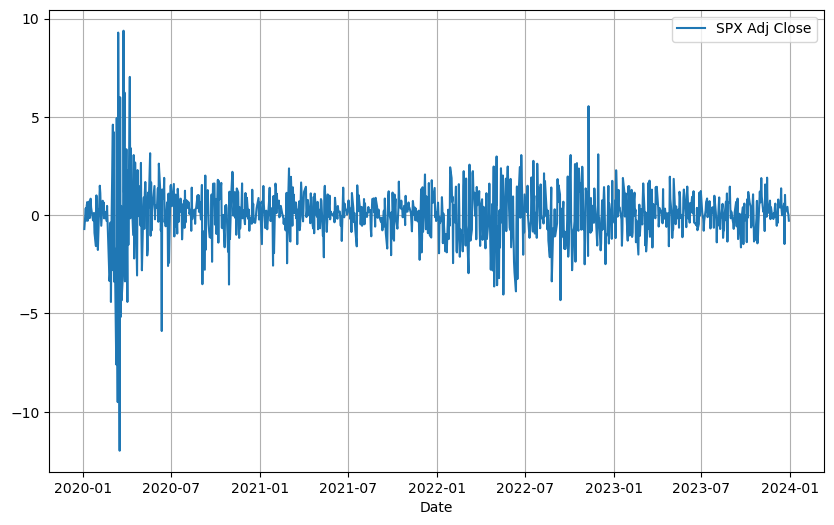

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(SPX_full_returns, label='SPX Adj Close')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# DATASETS:

# Alpha = 0.99:

In [143]:
Sim = 7000
#alpha=0.99:
#H_0: GARCH(1,1):
alph99_h0_garch =               th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.99, H_1_model = 'garch')
alph99_h0_garch_h1_garch =      th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'garch', H_0_model = 'garch')
alph99_h0_garch_h1_egarch =     th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'egarch', H_0_model = 'garch')

#H_0: EGARCH(1,1):
alph99_h0_egarch =              th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.99, H_1_model = 'egarch', H_0_model = 'egarch')
alph99_h0_egarch_h1_garch =     th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'garch', H_0_model = 'egarch')
alph99_h0_egarch_h1_egarch =    th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'egarch', H_0_model = 'egarch')

#H_0: Normal:
alph99_h0_normal =              th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.99, H_1_model = 'normal', H_0_model = 'normal')
alph99_h0_normal_h1_garch =     th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'garch', H_0_model = 'normal')
alph99_h0_normal_h1_egarch =    th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.99, H_1_model = 'egarch', H_0_model = 'normal')

/Users/amanda/Desktop/Bachelor/Kode endelig/Theory_Application.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MVAR_H_1_i = 0.95*MVAR_H_1[i]+0.05*returns_H_1[i]**2


# Alpha = 0.975:

In [144]:
#alpha=0.975:
#H_0: GARCH(1,1):
alph975_h0_garch =              th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.975, H_1_model = 'garch')
alph975_h0_garch_h1_garch =     th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'garch', H_0_model = 'garch')
alph975_h0_garch_h1_egarch =    th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'egarch', H_0_model = 'garch')

#H_0: EGARCH(1,1):
alph975_h0_egarch =             th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.975, H_1_model = 'egarch', H_0_model = 'egarch')
alph975_h0_egarch_h1_garch =    th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'garch', H_0_model = 'egarch')
alph975_h0_egarch_h1_egarch =   th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'egarch', H_0_model = 'egarch')

#H_0: Normal:
alph975_h0_normal =             th.DataGen(SPX_train_returns, SPX_train_returns, n=Sim, alpha = 0.975, H_1_model = 'normal', H_0_model = 'normal')
alph975_h0_normal_h1_garch =    th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'garch', H_0_model = 'normal')
alph975_h0_normal_h1_egarch =   th.DataGen(SPX_train_returns, SPX_test_returns,  n=Sim, alpha = 0.975, H_1_model = 'egarch', H_0_model = 'normal')

/Users/amanda/Desktop/Bachelor/Kode endelig/Theory_Application.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MVAR_H_1_i = 0.95*MVAR_H_1[i]+0.05*returns_H_1[i]**2


# VaR BACKTEST:

In [145]:
#H_0: GARCH(1,1):
VaRBack_h0_garch =               th.VaR_backtest(alph99_h0_garch[0], alph99_h0_garch[2], Sim)
VaRBack_h0_garch_h1_garch =      th.VaR_backtest(alph99_h0_garch_h1_garch[0], alph99_h0_garch_h1_garch[2], Sim)
VaRBack_h0_garch_h1_egarch =     th.VaR_backtest(alph99_h0_garch_h1_egarch[0], alph99_h0_garch_h1_egarch[2], Sim)

#H_0: EGARCH(1,1):
VaRBack_h0_egarch =              th.VaR_backtest(alph99_h0_egarch[0], alph99_h0_egarch[2], Sim)
VaRBack_h0_egarch_h1_garch =     th.VaR_backtest(alph99_h0_egarch_h1_garch[0], alph99_h0_egarch_h1_garch[2], Sim)
VaRBack_h0_egarch_h1_egarch =    th.VaR_backtest(alph99_h0_egarch_h1_egarch[0], alph99_h0_egarch_h1_egarch[2], Sim)

#H_0: Normal:
VaRBack_h0_normal =              th.VaR_backtest(alph99_h0_normal[0], alph99_h0_normal[2], Sim)
VaRBack_h0_normal_h1_garch =     th.VaR_backtest(alph99_h0_normal_h1_garch[0], alph99_h0_normal_h1_garch[2], Sim)
VaRBack_h0_normal_h1_egarch =    th.VaR_backtest(alph99_h0_normal_h1_egarch[0], alph99_h0_normal_h1_egarch[2], Sim)

# Z_1:

In [146]:
#H_0: GARCH(1,1):
Z_1Back_h0_garch =               th.Z_1_ES(alph975_h0_garch[0],alph975_h0_garch[1], alph975_h0_garch[2], Sim)
Z_1Back_h0_garch_h1_garch =      th.Z_1_ES(alph975_h0_garch_h1_garch[0],alph975_h0_garch_h1_garch[1], alph975_h0_garch_h1_garch[2], Sim)
Z_1Back_h0_garch_h1_egarch =     th.Z_1_ES(alph975_h0_garch_h1_egarch[0],alph975_h0_garch_h1_egarch[1], alph975_h0_garch_h1_egarch[2], Sim)

#H_0: EGARCH(1,1):
Z_1Back_h0_egarch =              th.Z_1_ES(alph975_h0_egarch[0],alph975_h0_egarch[1], alph975_h0_egarch[2], Sim)
Z_1Back_h0_egarch_h1_garch =     th.Z_1_ES(alph975_h0_egarch_h1_garch[0],alph975_h0_egarch_h1_garch[1], alph975_h0_egarch_h1_garch[2], Sim)
Z_1Back_h0_egarch_h1_egarch =    th.Z_1_ES(alph975_h0_egarch_h1_egarch[0],alph975_h0_egarch_h1_egarch[1], alph975_h0_egarch_h1_egarch[2], Sim)

#H_0: Normal:
Z_1Back_h0_normal =              th.Z_1_ES(alph975_h0_normal[0],alph975_h0_normal[1], alph975_h0_normal[2], Sim)
Z_1Back_h0_normal_h1_garch =     th.Z_1_ES(alph975_h0_normal_h1_garch[0],alph975_h0_normal_h1_garch[1], alph975_h0_normal_h1_garch[2], Sim)
Z_1Back_h0_normal_h1_egarch =    th.Z_1_ES(alph975_h0_normal_h1_egarch[0],alph975_h0_normal_h1_egarch[1], alph975_h0_normal_h1_egarch[2], Sim)

# Z_2:

In [147]:
#H_0: GARCH(1,1):
Z_2Back_h0_garch            =    th.Z_2_ES(alph975_h0_garch[0],alph975_h0_garch[1], alph975_h0_garch[2], Sim)
Z_2Back_h0_garch_h1_garch   =    th.Z_2_ES(alph975_h0_garch_h1_garch[0],alph975_h0_garch_h1_garch[1], alph975_h0_garch_h1_garch[2], Sim)
Z_2Back_h0_garch_h1_egarch  =    th.Z_2_ES(alph975_h0_garch_h1_egarch[0],alph975_h0_garch_h1_egarch[1], alph975_h0_garch_h1_egarch[2], Sim)

#H_0: EGARCH(1,1):
Z_2Back_h0_egarch            =   th.Z_2_ES(alph975_h0_egarch[0],alph975_h0_egarch[1], alph975_h0_egarch[2], Sim)
Z_2Back_h0_egarch_h1_garch   =   th.Z_2_ES(alph975_h0_egarch_h1_garch[0],alph975_h0_egarch_h1_garch[1], alph975_h0_egarch_h1_garch[2], Sim)
Z_2Back_h0_egarch_h1_egarch  =   th.Z_2_ES(alph975_h0_egarch_h1_egarch[0],alph975_h0_egarch_h1_egarch[1], alph975_h0_egarch_h1_egarch[2], Sim)

#H_0: Normal:
Z_2Back_h0_normal            =   th.Z_2_ES(alph975_h0_normal[0],alph975_h0_normal[1], alph975_h0_normal[2], Sim)
Z_2Back_h0_normal_h1_garch   =   th.Z_2_ES(alph975_h0_normal_h1_garch[0],alph975_h0_normal_h1_garch[1], alph975_h0_normal_h1_garch[2], Sim)
Z_2Back_h0_normal_h1_egarch  =   th.Z_2_ES(alph975_h0_normal_h1_egarch[0],alph975_h0_normal_h1_egarch[1], alph975_h0_normal_h1_egarch[2], Sim)

# N&Z:

In [151]:
#H_0: GARCH(1,1):
NZBack_h0_garch =               th.NZ_ES_one(alph975_h0_garch[0],alph975_h0_garch[1], alph975_h0_garch[2],alph975_h0_garch[3], n=Sim, alpha=0.975)
NZBack_h0_garch_h1_garch =      th.NZ_ES_one(alph975_h0_garch_h1_garch[0],alph975_h0_garch_h1_garch[1], alph975_h0_garch_h1_garch[2],alph975_h0_garch_h1_garch[3], n=Sim, alpha=0.975)
NZBack_h0_garch_h1_egarch =     th.NZ_ES_one(alph975_h0_garch_h1_egarch[0],alph975_h0_garch_h1_egarch[1], alph975_h0_garch_h1_egarch[2], alph975_h0_garch_h1_egarch[3], n=Sim, alpha=0.975)

#H_0: EGARCH(1,1):
NZBack_h0_egarch =              th.NZ_ES_one(alph975_h0_egarch[0],alph975_h0_egarch[1], alph975_h0_egarch[2],alph975_h0_egarch[3], n=Sim, alpha=0.975)
NZBack_h0_egarch_h1_garch =     th.NZ_ES_one(alph975_h0_egarch_h1_garch[0],alph975_h0_egarch_h1_garch[1], alph975_h0_egarch_h1_garch[2],alph975_h0_egarch_h1_garch[3], n=Sim, alpha=0.975)
NZBack_h0_egarch_h1_egarch =    th.NZ_ES_one(alph975_h0_egarch_h1_egarch[0],alph975_h0_egarch_h1_egarch[1], alph975_h0_egarch_h1_egarch[2], alph975_h0_egarch_h1_egarch[3], n=Sim, alpha=0.975)

#H_0: Normal:
NZBack_h0_normal =              th.NZ_ES_one(alph975_h0_normal[0],alph975_h0_normal[1], alph975_h0_normal[2], alph975_h0_normal[3], n=Sim, alpha=0.975)
NZBack_h0_normal_h1_garch =     th.NZ_ES_one(alph975_h0_normal_h1_garch[0],alph975_h0_normal_h1_garch[1], alph975_h0_normal_h1_garch[2],alph975_h0_normal_h1_garch[3], n=Sim, alpha=0.975)
NZBack_h0_normal_h1_egarch =    th.NZ_ES_one(alph975_h0_normal_h1_egarch[0],alph975_h0_normal_h1_egarch[1], alph975_h0_normal_h1_egarch[2], alph975_h0_normal_h1_egarch[3], n=Sim, alpha=0.975)

# T Vals:

In [156]:
#H_0: GARCH(1,1):
T_NZBack_h0_garch =               [NZBack_h0_garch[0][j][i] for j, i in enumerate(NZBack_h0_garch[3])]
T_NZBack_h0_garch_h1_garch =      [NZBack_h0_garch_h1_garch[0][j][i] for j,i in enumerate(NZBack_h0_garch_h1_garch[3])]
T_NZBack_h0_garch_h1_egarch =     [NZBack_h0_garch_h1_egarch[0][j][i] for j,i in enumerate(NZBack_h0_garch_h1_egarch[3])]

#H_0: EGARCH(1,1):
T_NZBack_h0_egarch =              [NZBack_h0_egarch[0][j][i] for j,i in enumerate(NZBack_h0_egarch[3])]
T_NZBack_h0_egarch_h1_garch =     [NZBack_h0_egarch_h1_garch[0][j][i] for j,i in enumerate(NZBack_h0_egarch_h1_garch[3])]
T_NZBack_h0_egarch_h1_egarch =    [NZBack_h0_egarch_h1_egarch[0][j][i] for j,i in enumerate(NZBack_h0_egarch_h1_egarch[3])]

#H_0: Normal:
T_NZBack_h0_normal =              [NZBack_h0_normal[0][j][i] for j,i in enumerate(NZBack_h0_normal[3])]
T_NZBack_h0_normal_h1_garch =     [NZBack_h0_normal_h1_garch[0][j][i] for j,i in enumerate(NZBack_h0_normal_h1_garch[3])]
T_NZBack_h0_normal_h1_egarch =    [NZBack_h0_normal_h1_egarch[0][j][i] for j,i in enumerate(NZBack_h0_normal_h1_egarch[3])]

# Udregning af p-værdier og Power:

In [158]:
def CDF(data):
        data_sorted = np.sort(data)
        return np.arange(1, len(data_sorted) + 1) / len(data_sorted)

def compute_critical_value(data_null, significance_level):
    data_sorted = np.sort(data_null)
    cdf_0 = CDF(data_sorted)
    significance_lower = significance_level / 2
    significance_upper = 1 - significance_level / 2
    crit_value_lower = data_sorted[np.argmax(cdf_0 >= significance_lower)]
    crit_value_upper = data_sorted[np.argmax(cdf_0 >= significance_upper)]
    return [crit_value_lower, crit_value_upper]


def compute_powers(data, data_null, significance_level):
    critical_values = compute_critical_value(data_null, significance_level)
    power = (np.sum(data <= critical_values[0]) + np.sum(data >= critical_values[1])) / len(data)
    return power

# VaR_99 crit vals:

In [159]:
length_relation = len(SPX_train_returns)/len(SPX_test_returns)

print(compute_critical_value(VaRBack_h0_garch[0]/length_relation, significance_level=0.128))
signif_garch = 0.122

print(compute_critical_value(VaRBack_h0_egarch[0]/length_relation, significance_level=0.123))
signif_egarch = 0.123

print(compute_critical_value(VaRBack_h0_normal[0]/length_relation, significance_level=0.128))
signif_normal = 0.128


[3.9576158940397352, 8.245033112582782]
[3.2980132450331126, 7.585430463576159]
[1.6490066225165563, 5.276821192052981]


# VaR_99:

In [160]:
#H_0: GARCH(1,1):
VaR_power_h0_garch_h1_garch = compute_powers(data = VaRBack_h0_garch_h1_garch[0], data_null = VaRBack_h0_garch[0]/length_relation, significance_level = signif_garch)
VaR_power_h0_garch_h1_egarch = compute_powers(data = VaRBack_h0_garch_h1_egarch[0], data_null = VaRBack_h0_garch[0]/length_relation, significance_level = signif_garch)

#H_0: EGARCH(1,1):
VaR_power_h0_egarch_h1_garch = compute_powers(data = VaRBack_h0_egarch_h1_garch[0], data_null = VaRBack_h0_egarch[0]/length_relation, significance_level = signif_egarch)
VaR_power_h0_egarch_h1_egarch = compute_powers(data = VaRBack_h0_egarch_h1_egarch[0], data_null = VaRBack_h0_egarch[0]/length_relation, significance_level = signif_egarch)

#H_0: Normal:
VaR_power_h0_normal_h1_garch = compute_powers(data = VaRBack_h0_normal_h1_garch[0], data_null = VaRBack_h0_normal[0]/length_relation, significance_level = signif_normal)
VaR_power_h0_normal_h1_egarch = compute_powers(data = VaRBack_h0_normal_h1_egarch[0], data_null = VaRBack_h0_normal[0]/length_relation, significance_level = signif_normal)

# Z_1:

In [161]:
#H_0: GARCH(1,1):
Z1_power_h0_garch_h1_garch = compute_powers(data = Z_1Back_h0_garch_h1_garch[0], data_null = Z_1Back_h0_garch[0], significance_level = signif_garch)
Z1_power_h0_garch_h1_egarch = compute_powers(data = Z_1Back_h0_garch_h1_egarch[0], data_null = Z_1Back_h0_garch[0], significance_level = signif_garch)

#H_0: EGARCH(1,1):
Z1_power_h0_egarch_h1_garch = compute_powers(data = Z_1Back_h0_egarch_h1_garch[0], data_null = Z_1Back_h0_egarch[0], significance_level = signif_egarch)
Z1_power_h0_egarch_h1_egarch = compute_powers(data = Z_1Back_h0_egarch_h1_egarch[0], data_null = Z_1Back_h0_egarch[0], significance_level = signif_egarch)

#H_0: Normal:
Z1_power_h0_normal_h1_garch = compute_powers(data = Z_1Back_h0_normal_h1_garch[0], data_null = Z_1Back_h0_normal[0], significance_level = signif_normal)
Z1_power_h0_normal_h1_egarch = compute_powers(data = Z_1Back_h0_normal_h1_egarch[0], data_null = Z_1Back_h0_normal[0], significance_level = signif_normal)

# Z_2:

In [162]:
#H_0: GARCH(1,1):
Z2_power_h0_garch_h1_garch = compute_powers(data = Z_2Back_h0_garch_h1_garch[0], data_null = Z_2Back_h0_garch[0], significance_level = signif_garch)
Z2_power_h0_garch_h1_egarch = compute_powers(data = Z_2Back_h0_garch_h1_egarch[0], data_null = Z_2Back_h0_garch[0], significance_level = signif_garch)

#H_0: EGARCH(1,1):
Z2_power_h0_egarch_h1_garch = compute_powers(data = Z_2Back_h0_egarch_h1_garch[0], data_null = Z_2Back_h0_egarch[0], significance_level = signif_egarch)
Z2_power_h0_egarch_h1_egarch = compute_powers(data = Z_2Back_h0_egarch_h1_egarch[0], data_null = Z_2Back_h0_egarch[0], significance_level = signif_egarch)

#H_0: Normal:
Z2_power_h0_normal_h1_garch = compute_powers(data = Z_2Back_h0_normal_h1_garch[0], data_null = Z_2Back_h0_normal[0], significance_level = signif_normal)
Z2_power_h0_normal_h1_egarch = compute_powers(data = Z_2Back_h0_normal_h1_egarch[0], data_null = Z_2Back_h0_normal[0], significance_level = signif_normal)

# NZ:

In [163]:
#H_0: GARCH(1,1):
NZ_power_h0_garch_h1_garch = compute_powers(data = T_NZBack_h0_garch_h1_garch, data_null = np.array(T_NZBack_h0_garch), significance_level = signif_garch)
NZ_power_h0_garch_h1_egarch = compute_powers(data = T_NZBack_h0_garch_h1_egarch, data_null = np.array(T_NZBack_h0_garch), significance_level = signif_garch)

#H_0: EGARCH(1,1):
NZ_power_h0_egarch_h1_garch = compute_powers(data = T_NZBack_h0_egarch_h1_garch, data_null = np.array(T_NZBack_h0_egarch), significance_level = signif_egarch)
NZ_power_h0_egarch_h1_egarch = compute_powers(data = T_NZBack_h0_egarch_h1_egarch, data_null = np.array(T_NZBack_h0_egarch), significance_level = signif_egarch)

#H_0: Normal:
NZ_power_h0_normal_h1_garch = compute_powers(data = T_NZBack_h0_normal_h1_garch, data_null = np.array(T_NZBack_h0_normal), significance_level = signif_normal)
NZ_power_h0_normal_h1_egarch = compute_powers(data = T_NZBack_h0_normal_h1_egarch, data_null = np.array(T_NZBack_h0_normal), significance_level = signif_normal)

In [164]:
print(NZ_power_h0_garch_h1_garch)
print(NZ_power_h0_garch_h1_egarch)
print(NZ_power_h0_egarch_h1_garch)
print(NZ_power_h0_egarch_h1_egarch)
print(NZ_power_h0_normal_h1_garch)
print(NZ_power_h0_normal_h1_egarch)

0.4625714285714286
0.21985714285714286
0.7002857142857143
0.4208571428571429
0.385
0.18885714285714286


In [165]:
print(Z2_power_h0_garch_h1_garch)
print(Z2_power_h0_garch_h1_egarch)
print(Z2_power_h0_egarch_h1_garch)
print(Z2_power_h0_egarch_h1_egarch)
print(Z2_power_h0_normal_h1_garch)
print(Z2_power_h0_normal_h1_egarch)

0.8267142857142857
0.5521428571428572
0.9154285714285715
0.6355714285714286
0.3554285714285714
0.3732857142857143


In [166]:
print(Z1_power_h0_garch_h1_garch)
print(Z1_power_h0_garch_h1_egarch)
print(Z1_power_h0_egarch_h1_garch)
print(Z1_power_h0_egarch_h1_egarch)
print(Z1_power_h0_normal_h1_garch)
print(Z1_power_h0_normal_h1_egarch)

0.6566181566181566
0.443241469816273
0.661219512195122
0.5127411721878413
0.4999249812453113
0.381149498487502


In [167]:
print(VaR_power_h0_garch_h1_garch)
print(VaR_power_h0_garch_h1_egarch)
print(VaR_power_h0_egarch_h1_garch)
print(VaR_power_h0_egarch_h1_egarch)
print(VaR_power_h0_normal_h1_garch)
print(VaR_power_h0_normal_h1_egarch)

0.6547142857142857
0.4481428571428571
0.8897142857142857
0.6324285714285715
0.33985714285714286
0.3231428571428571


# Plots:

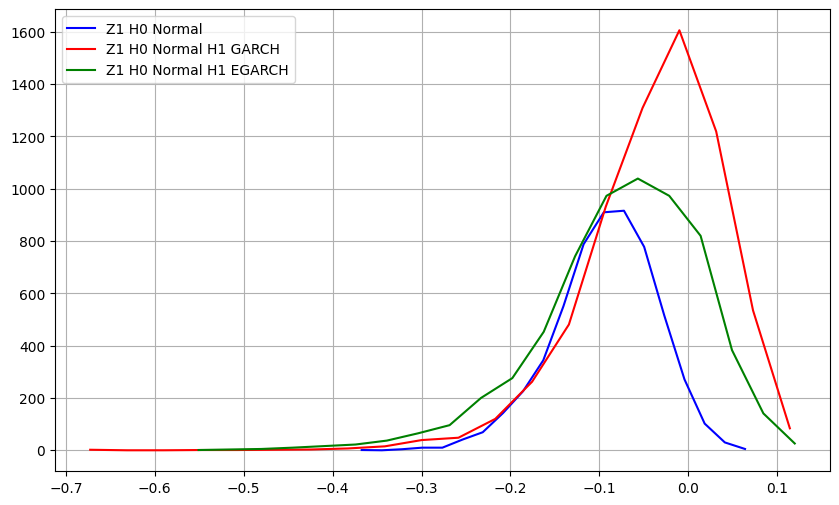

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_1Back_h0_normal[0], bins=20)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z1 H0 Normal')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_1Back_h0_normal_h1_garch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z1 H0 Normal H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_1Back_h0_normal_h1_egarch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z1 H0 Normal H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

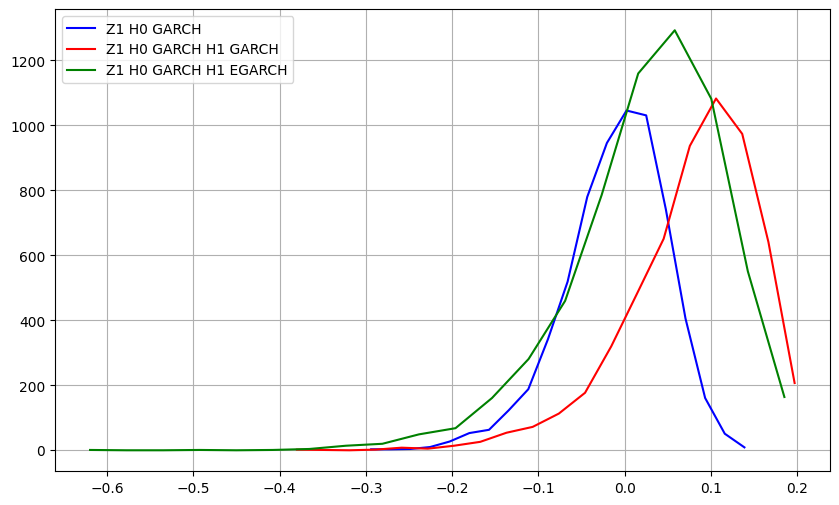

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_1Back_h0_garch[0], bins=20)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z1 H0 GARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_1Back_h0_garch_h1_garch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z1 H0 GARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_1Back_h0_garch_h1_egarch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z1 H0 GARCH H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

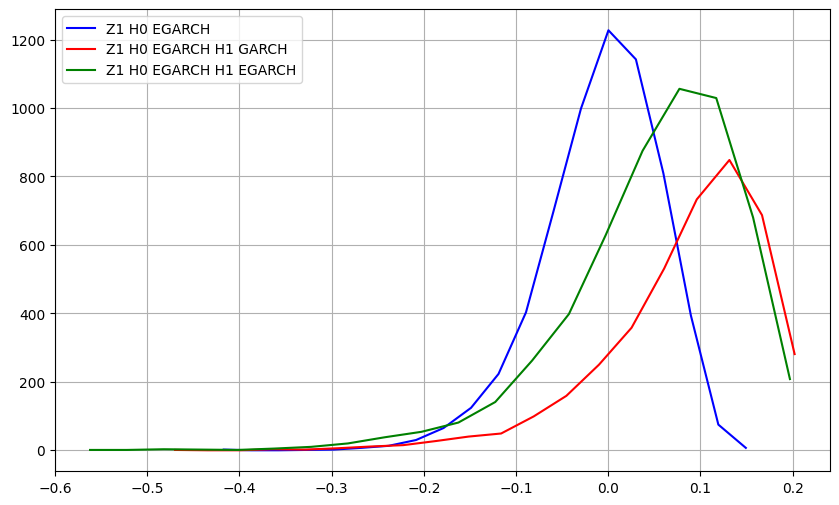

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_1Back_h0_egarch[0], bins=20)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z1 H0 EGARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_1Back_h0_egarch_h1_garch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z1 H0 EGARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_1Back_h0_egarch_h1_egarch[0], bins=20)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z1 H0 EGARCH H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

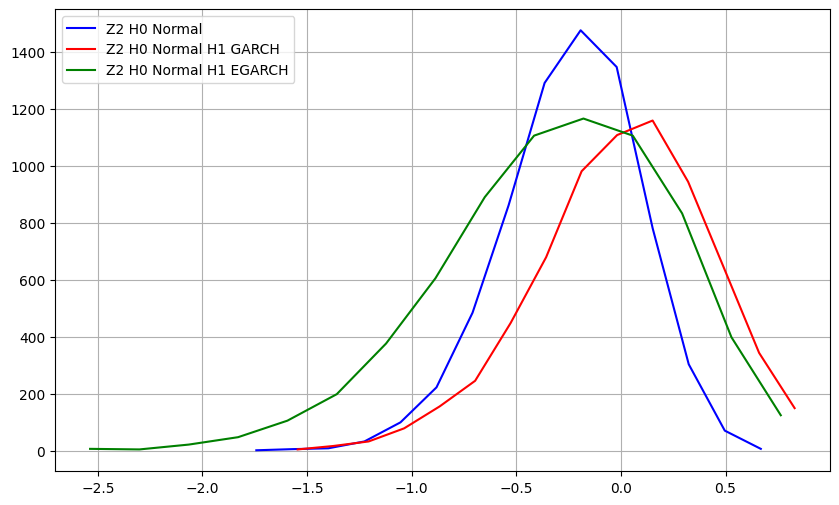

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_2Back_h0_normal[0], bins=15)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z2 H0 Normal')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_2Back_h0_normal_h1_garch[0], bins=15)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z2 H0 Normal H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_2Back_h0_normal_h1_egarch[0], bins=15)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z2 H0 Normal H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

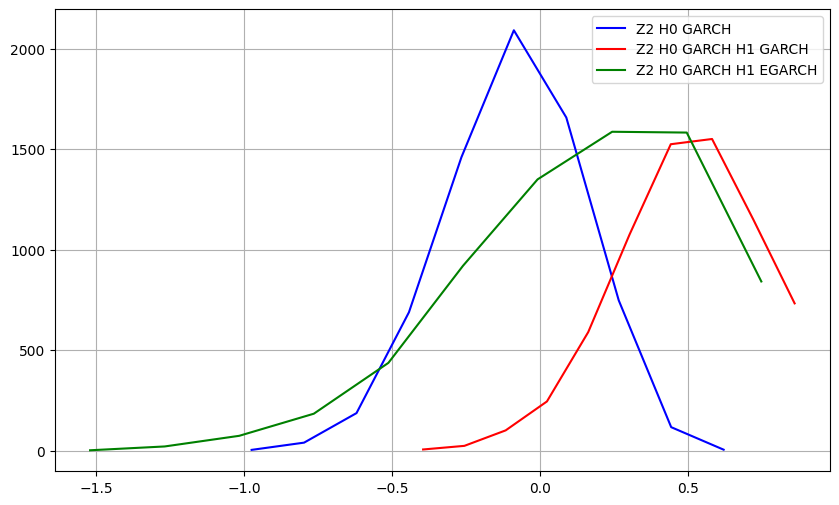

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_2Back_h0_garch[0], bins=10)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z2 H0 GARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_2Back_h0_garch_h1_garch[0], bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z2 H0 GARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_2Back_h0_garch_h1_egarch[0], bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z2 H0 GARCH H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

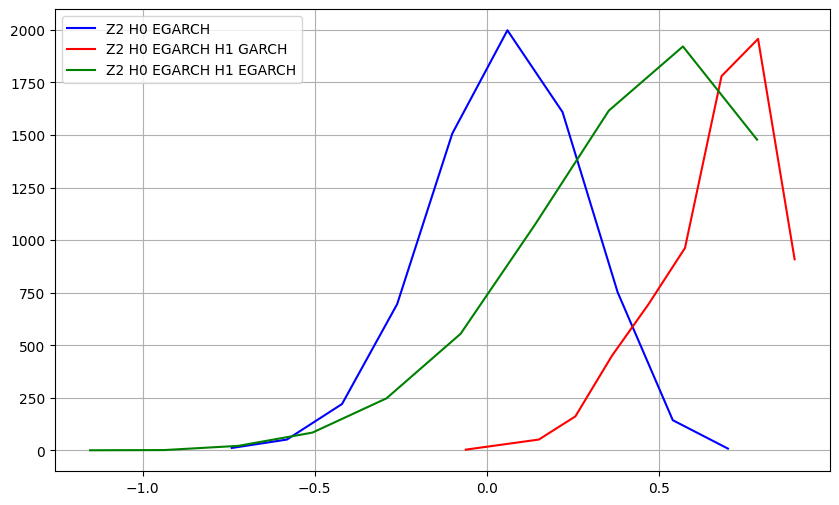

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(Z_2Back_h0_egarch[0], bins=10)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='Z2 H0 EGARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(Z_2Back_h0_egarch_h1_garch[0], bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='Z2 H0 EGARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(Z_2Back_h0_egarch_h1_egarch[0], bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='Z2 H0 EGARCH H1 EGARCH')


# Tilføj titler og labels
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

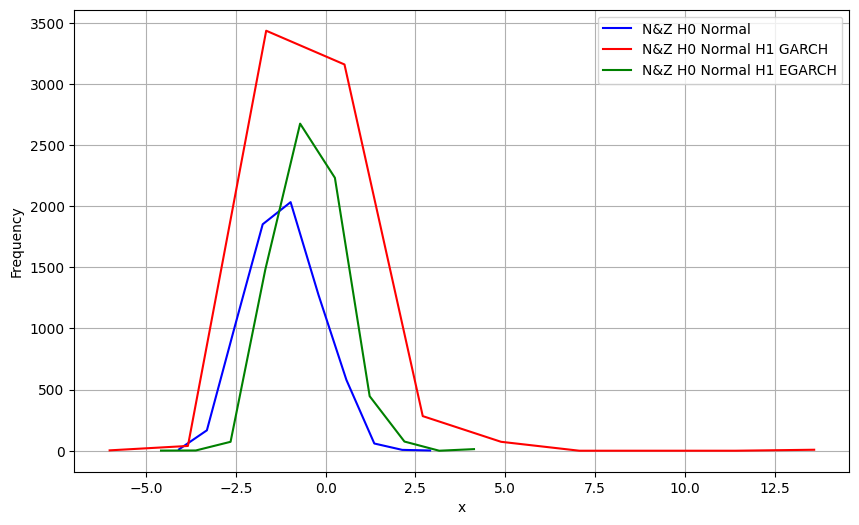

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(T_NZBack_h0_normal, bins=10)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='N&Z H0 Normal')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(T_NZBack_h0_normal_h1_garch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='N&Z H0 Normal H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(T_NZBack_h0_normal_h1_egarch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='N&Z H0 Normal H1 EGARCH')


# Tilføj titler og labels
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

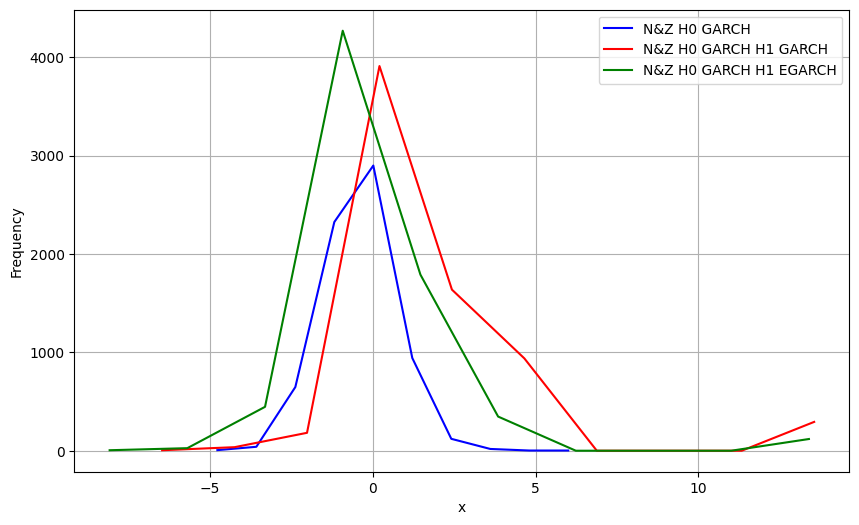

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(T_NZBack_h0_garch, bins=10)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='N&Z H0 GARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(T_NZBack_h0_garch_h1_garch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='N&Z H0 GARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(T_NZBack_h0_garch_h1_egarch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='N&Z H0 GARCH H1 EGARCH')


# Tilføj titler og labels
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()

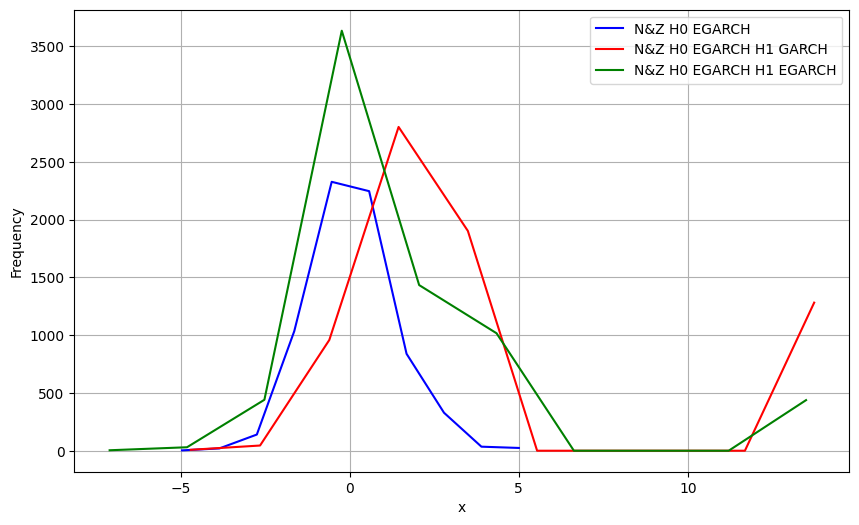

In [ ]:
# Beregn histogram data for det første datasæt
counts, bin_edges = np.histogram(T_NZBack_h0_egarch, bins=10)

# Plot histogram som linje for det første datasæt
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, linestyle='-', color='blue', label='N&Z H0 EGARCH')

# Beregn histogram data for det andet datasæt
counts2, bin_edges2 = np.histogram(T_NZBack_h0_egarch_h1_garch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges2[:-1], counts2, linestyle='-', color='red', label='N&Z H0 EGARCH H1 GARCH')

# Beregn histogram data for det andet datasæt
counts3, bin_edges3 = np.histogram(T_NZBack_h0_egarch_h1_egarch, bins=10)

# Plot histogram som linje for det andet datasæt
plt.plot(bin_edges3[:-1], counts3, linestyle='-', color='green', label='N&Z H0 EGARCH H1 EGARCH')


# Tilføj titler og labels
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)

# Tilføj en legend
plt.legend()

# Vis plottet
plt.show()